# **Manejo de DataSet de vinos para predicción de la calidad**

<a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">**DataSet Kaggle**</a>

1. [Obtención de datos](#obtención-de-datos)

2. [Lectura de datos y analisis de ellos](#lectura-de-datos-y-analisis-de-ellos)
    1. [Picos](#picos)
     <p></p>

3. [Visualización de datos](#visualización-de-datos)
    1. [Scatter](#scatter-de-ácido-volátil-ácido-citrico-y-calidad-del-vino)

    2. [BoxPlot](#boxplot-de-coorrelaciones)

    3. [Mátriz de coorrelación](#matriz-de-correlación-y-mapa-de-calor)
    
    4. [Scatter Matrix](#scatter-matrix)

4. [Experimentación con columnas](#experimentación-con-columnas)

5. [Preparación de datos](#preparación-de-datos)
    1. [Limpieza](#limpieza)
    
    2. [División de datos](#división-de-datos)

6. [Definición de los modelos](#definición-de-los-modelos)
    1. [LINEAL](#lineal)

    2. [ÁRBOL DE DECISIONES](#árbol-de-decisiones)

    3. [VALIDACIÓN CRUZADA DEL ÁRBOL DE DECISIONES](#validación-cruzada-del-árbol-de-decisiones)

    4. [RANDOM FOREST MODELO](#random-forest-modelo)

    5. [SVR](#svr)

    6. [XGBOOST](#xgboost)

# **Obtención de datos**

Descargamos el dataset de forma local y cogemos su ruta para leer el .csv y meterlo a un DataFrame de Pandas donde trataremos los datos

In [261]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [262]:
import pandas as pd


wine = pd.read_csv(path+"winequality-red.csv")

# **Lectura de datos y analisis de ellos**

Leemos los datos y analizamos que tipo de datos son las columnas y vemos cuales son Nulos. Etc...

In [263]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [264]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<p style="color:yellow">ADVERTENCIA</p>Como vemos no tenemos ninguna columna con valores nulos, en caso de tenerlo deberiamos tratarlo en su respectivo tratamiento de datos

In [265]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [266]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Picos

Vemos los picos, donde muchos componen picos normales, pero otros picos son más extraños

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

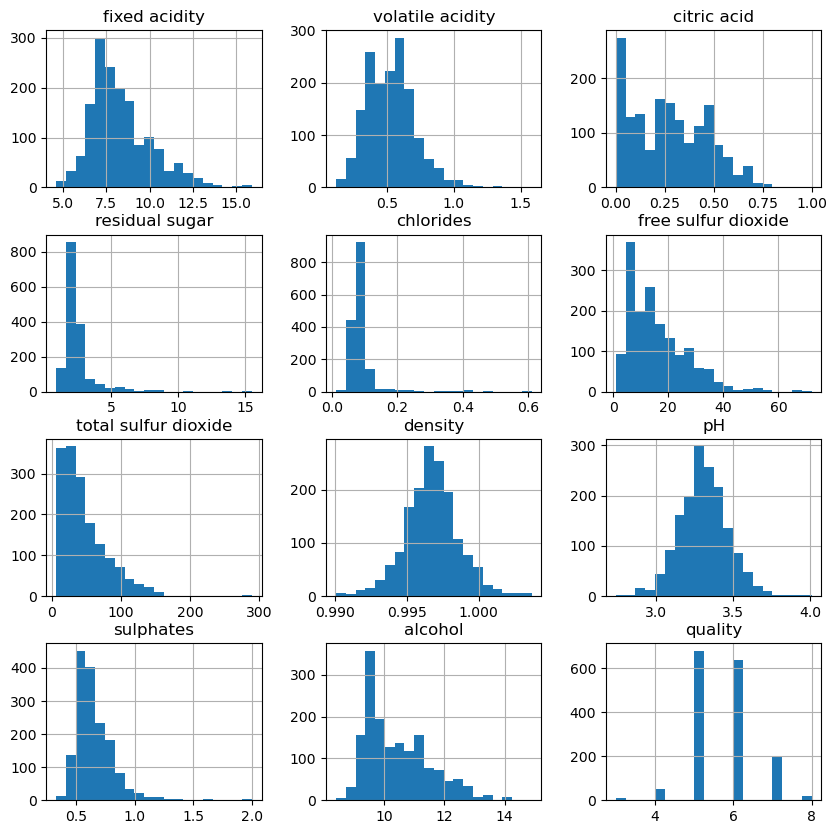

In [267]:
wine.hist(bins=20,figsize=(10,10))

# **Visualización de datos**

## Scatter de ácido volátil, ácido citrico y calidad del vino

Vemos una pequeña relación entre el ácido volatil con el citrico, cuando menos acido cítrico por norma general es mayor el ácido volatil, mientras que si se acerca el vino al pico del ácido volatil, pierde calidad

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

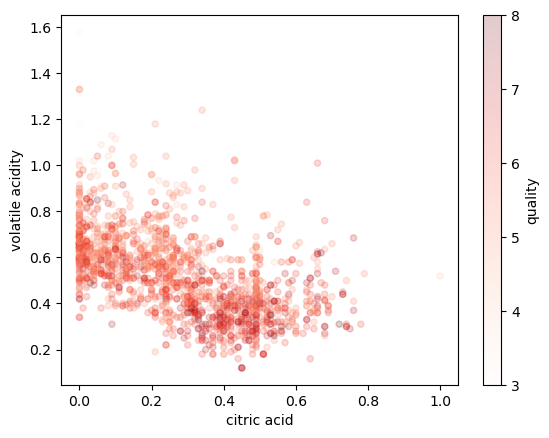

In [268]:
wine.plot.scatter(y="volatile acidity",x="citric acid",alpha=0.2,c="quality",cmap="Reds")

## BoxPlot de coorrelaciones

Tenemos un BoxPlot de las coorrelaciones de la calidad del vino con las diferentes columnas que ya hay en la propia tabla, esto nos permite eliminar los Ouliers que eliminaremos más adelante

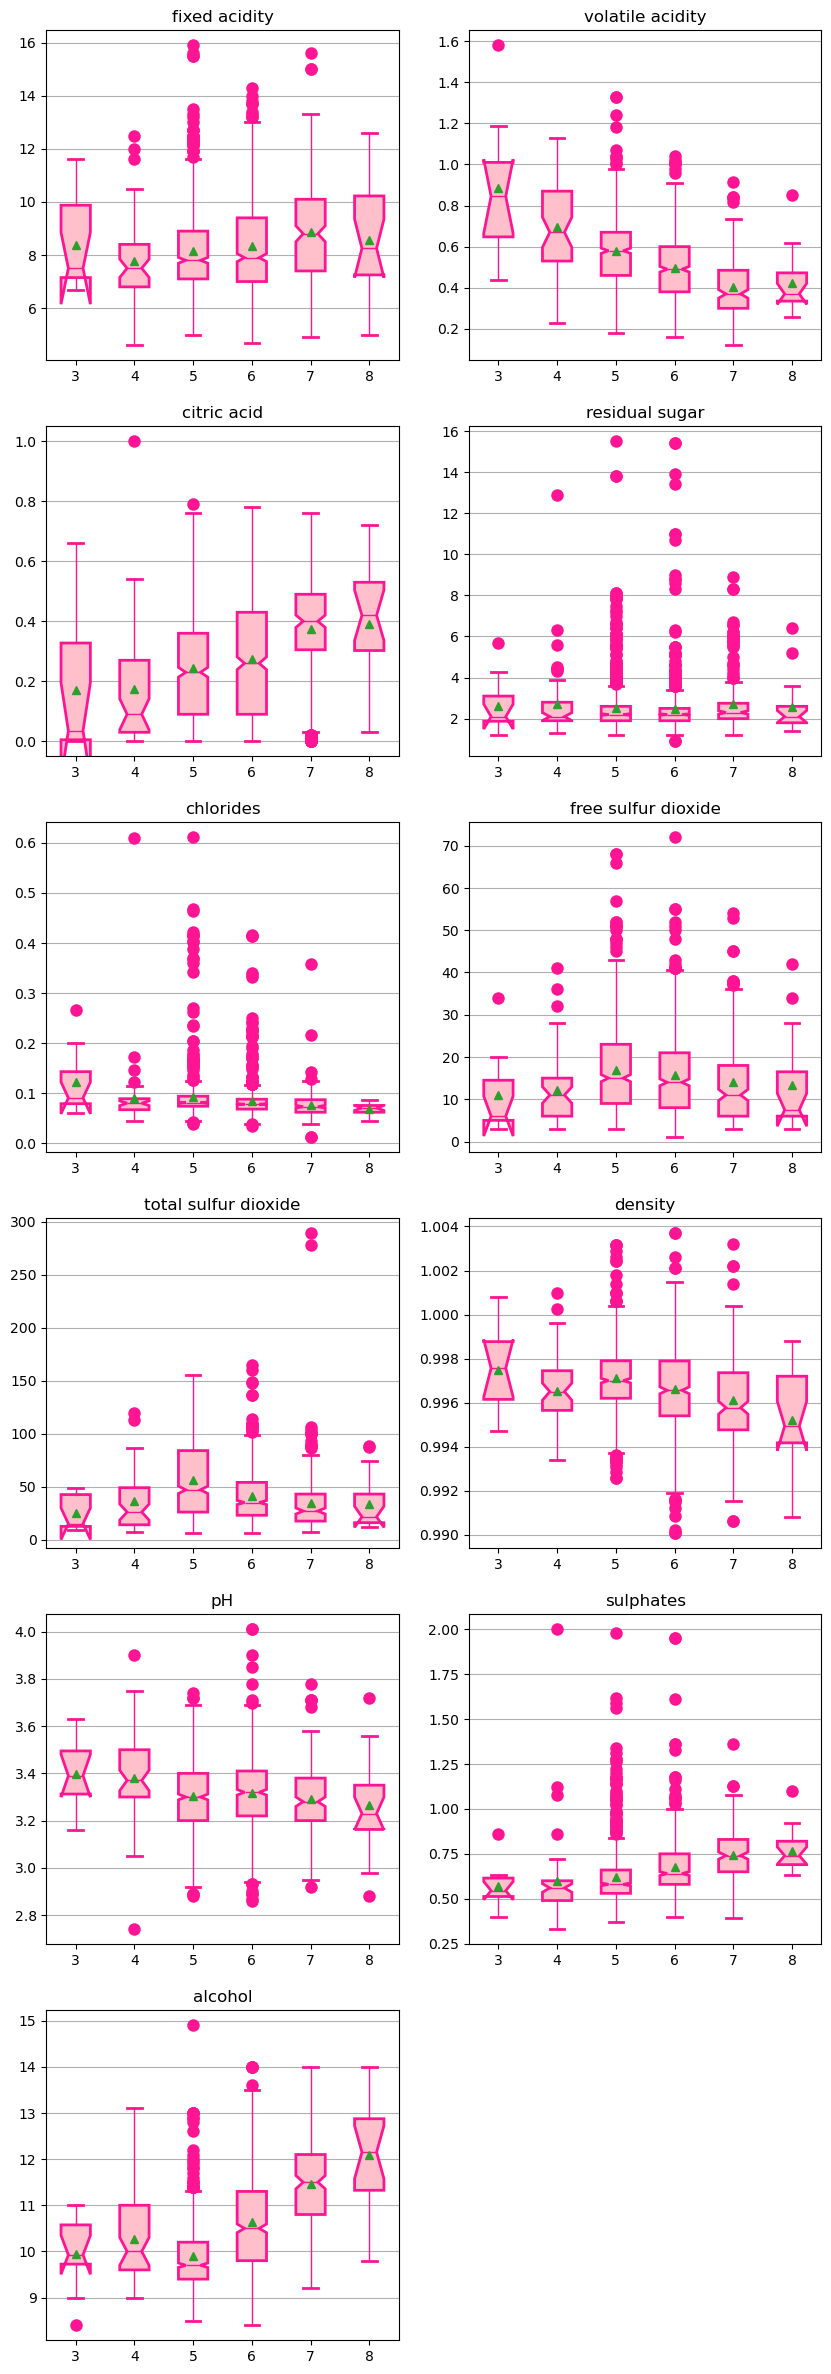

In [269]:
from matplotlib import pyplot as plt

from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(types=wine.columns,by="quality",dataFrame=wine,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")


## Matriz de correlación y mapa de calor

Con el mapa de calor de las relaciones podemos los campos que más se relacionan entre ellos y los que son más importantes para calidad así permitiendo descartar columnas no muy importantes

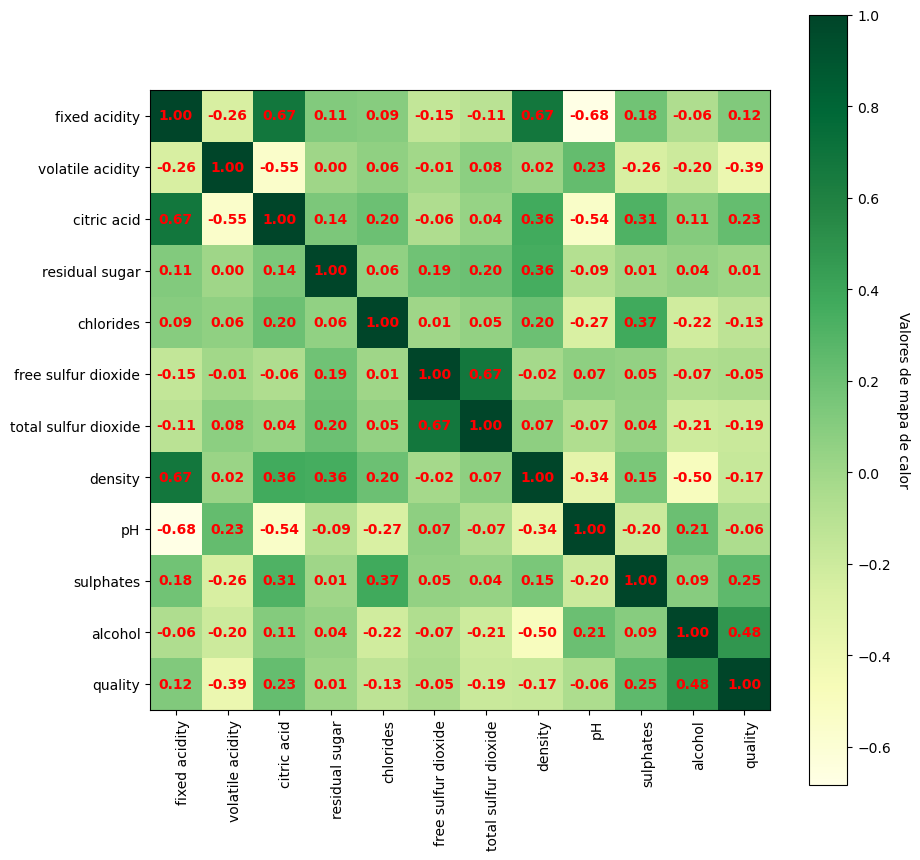

In [270]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = wine.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(10,10),weight="bold",textColor="red")

## Scatter matrix

Scatter matrix de las columnas para ver los pícos de las columnas y diferencias entre relaciones

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

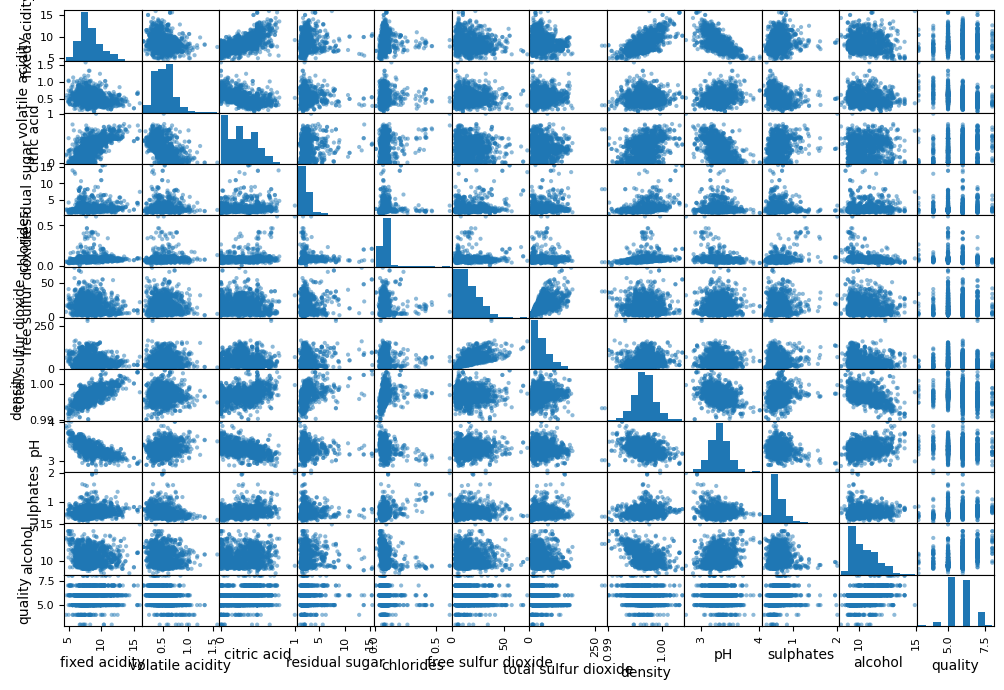

In [271]:
from pandas.plotting import scatter_matrix
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
scatter_matrix(wine[columns], figsize=(12,8))

# **Experimentación con columnas**

En este caso me interesó probar con datos que me parecen que pueden tener relación entre ellos en este caso 
<li style="color:red">El total del sulfuro con su free sulfur</li>
<li style="color:red">El ácido fixed y el cítrico</li>
<li style="color:green">El ácido fixed y la densidad</li>

In [272]:
wine['free_sulfur_dioxide_per_total_sulfur_dioxide'] = wine['total sulfur dioxide']/wine['free sulfur dioxide']

wine['citric_acid_per_fixed_acidity'] = wine['fixed acidity']/wine['citric acid']

wine['density_per_fixed_acidity'] = wine['fixed acidity']/wine['density']

wine['acidity'] = wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid']

In [273]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_per_total_sulfur_dioxide,citric_acid_per_fixed_acidity,density_per_fixed_acidity,acidity
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.029710,-0.265570,0.999975,0.996384
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.053302,0.308526,-0.257987,-0.204351
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.067317,-0.547972,0.672531,0.690438
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.050021,-0.075493,0.112075,0.124488
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.081575,-0.089861,0.092681,0.116675
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.217280,0.015757,-0.154580,-0.153614
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.331133,-0.087213,-0.114539,-0.096276
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.138697,-0.174274,0.663108,0.675596
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.108620,0.269624,-0.684398,-0.683484
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.055982,-0.146641,0.182801,0.181603


Vemos que dos de estas no salen con buenas relaciones, entonces los descartamos

In [274]:
wine.drop(['citric_acid_per_fixed_acidity',
           #'free_sulfur_dioxide_per_total_sulfur_dioxide',
           ],axis=1,inplace=True)



# **Preparación de datos**

## Limpieza

Vemos que los campos no tienen nulos por lo que no será necesario tratar los valores nulos de estos

In [275]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   fixed acidity                                 1599 non-null   float64
 1   volatile acidity                              1599 non-null   float64
 2   citric acid                                   1599 non-null   float64
 3   residual sugar                                1599 non-null   float64
 4   chlorides                                     1599 non-null   float64
 5   free sulfur dioxide                           1599 non-null   float64
 6   total sulfur dioxide                          1599 non-null   float64
 7   density                                       1599 non-null   float64
 8   pH                                            1599 non-null   float64
 9   sulphates                                     1599 non-null   f

Definimos una función para el tratamiento de Outliers

In [276]:
import numpy as np
from scipy import stats


def tratamiento_outliers(columna,x,y):
    """Min y Max de una columna

    Args:
        columna (object): Columna a tratar
        x (float): Min
        y (float): Max

    Returns:
        List(float): Min y Max
    """
    sorted(columna)
    Q1,Q3 = np.percentile(columna,[x,y])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

def borrar_outliers(df,columns):
    """Borra los Outliers

    Args:
        df (DataFrame): DataFrame con los datos
        columns (X): Columnas

    Returns:
        DataFrame: Nuevo DataFrame con los datos borrados
    """
    for i,value in columns.items():
        if df[i].dtype == 'float64':
            low,high=tratamiento_outliers(df[i],value[0],value[1])
            df.drop(
                df[(df[i] > high) | (df[i] < low) ].index , 
                inplace=True)
            #df_filtrado = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df

In [277]:
#columnas=["quality","alcohol","sulphates","chlorides","residual sugar","citric acid","fixed acidity"]
#columnas = ["quality","alcohol","sulphates","pH","density","total sulfur dioxide","free sulfur dioxide","chlorides","residual sugar","citric acid","volatile acidity","fixed acidity"]
from matplotlib import axis


s = wine['quality']
wine.drop('quality',axis=1,inplace=True)
columnas = {#'citric acid':[10,90],
            'chlorides':[10.5,89.5],
            #'density':[17.5,82.5],
            #'alcohol':[10,90], 
            'free_sulfur_dioxide_per_total_sulfur_dioxide':[10,90],
            'sulphates':[2,98], 
            'free sulfur dioxide':[5,95],
            }
wine=borrar_outliers(wine,columnas)
wine['quality'] = s
columnas = list(wine.columns)
#columnas.remove('residual sugar')
#columnas.remove('free sulfur dioxide')
#columnas.remove('pH')
columnas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'free_sulfur_dioxide_per_total_sulfur_dioxide',
 'density_per_fixed_acidity',
 'acidity',
 'quality']

In [278]:
wine.size

23100

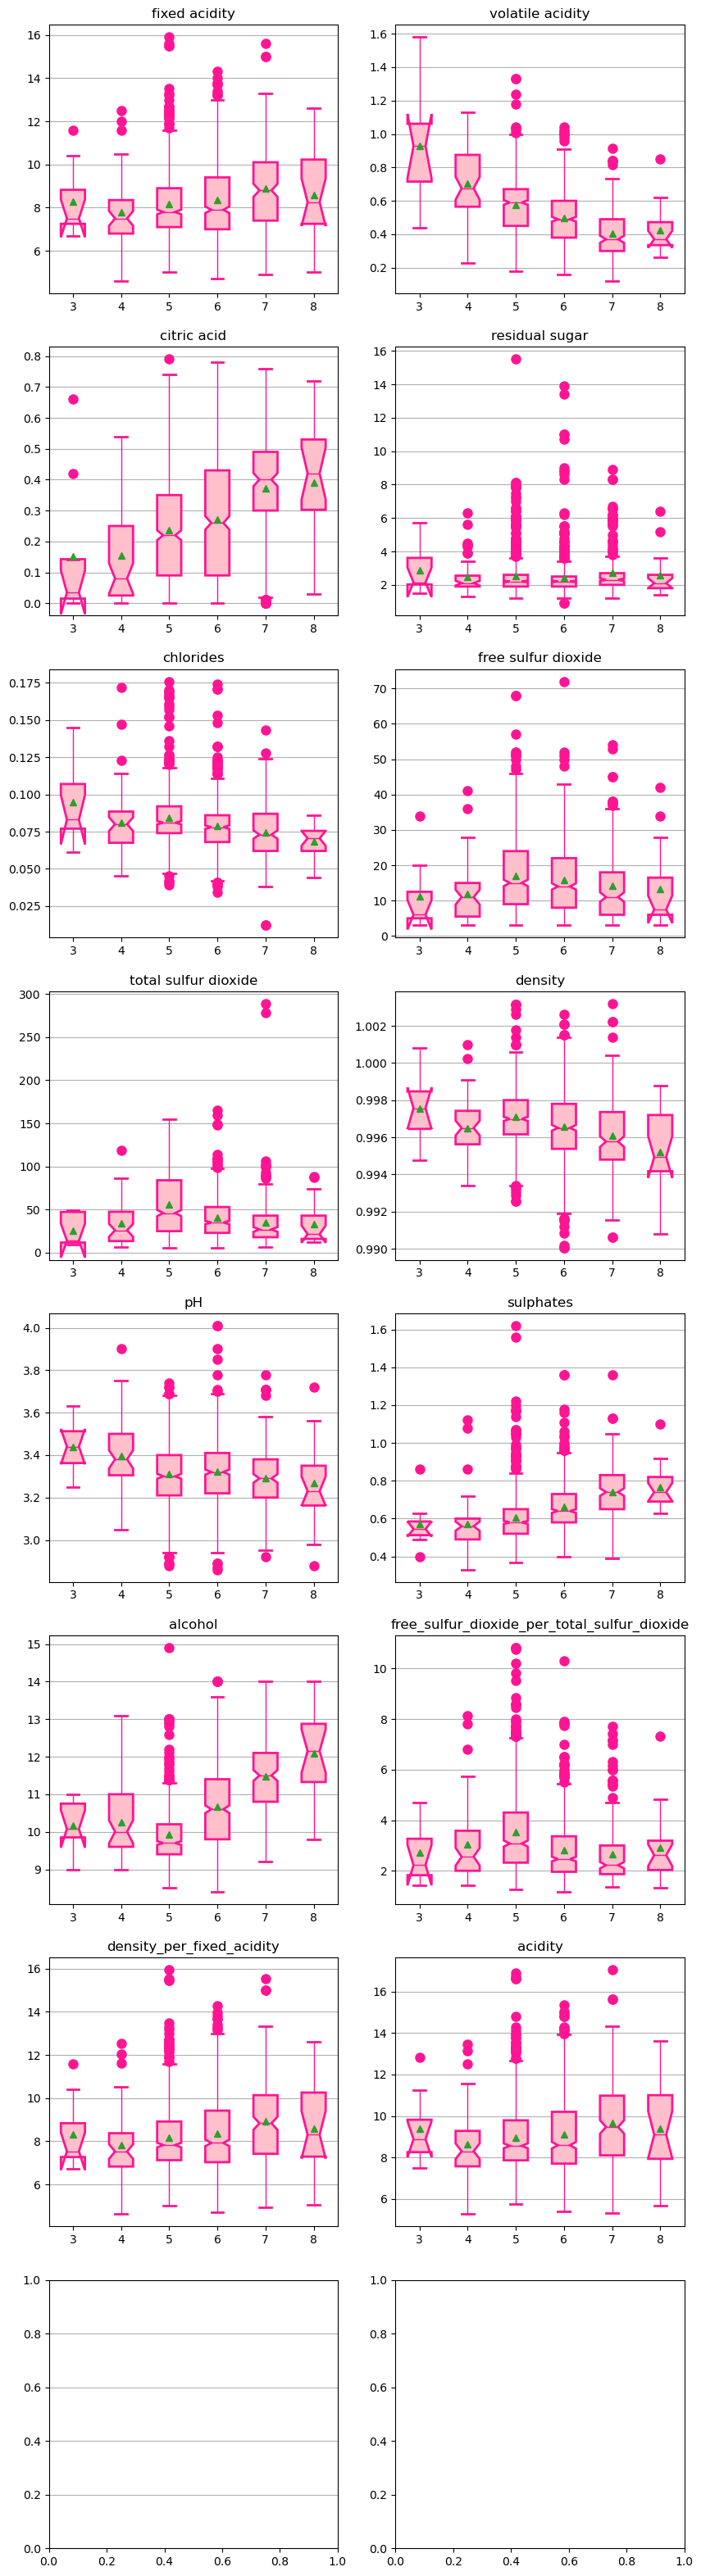

In [279]:
BoxPlot.box_plot(types=columnas,by="quality",dataFrame=wine,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")

In [280]:
from sklearn.calibration import LabelEncoder

le=LabelEncoder()
X=wine.drop('quality',axis=1)
y=le.fit_transform(wine['quality'])

## División de datos

Definimos una función para dividir el entrenamiento con un ratio (Ya existe una función que lo hace por si solo)

In [281]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full)

In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [283]:
y_test

array([2, 4, 2, 1, 3, 2, 2, 3, 4, 4, 2, 1, 2, 2, 3, 4, 2, 3, 2, 3, 2, 3,
       4, 4, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 3, 3, 2, 3, 3, 3, 3, 4, 2,
       4, 2, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 4, 3, 5,
       3, 2, 4, 2, 2, 2, 2, 2, 4, 4, 3, 4, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 3, 3, 2, 2, 4, 3, 4, 3, 5, 3, 4, 2, 3, 2, 3, 3, 4, 2,
       4, 4, 2, 4, 2, 2, 3, 3, 2, 3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 2,
       2, 3, 3, 2, 3, 4, 4, 3, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3,
       4, 2, 3, 4, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 4, 3, 2, 2, 2, 3, 2,
       2, 4, 4, 4, 3, 1, 3, 3, 3, 2, 3, 0, 2, 2, 4, 3, 4, 2, 2, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 4, 3, 2, 2, 2, 3, 2, 2, 3, 4, 2, 3, 2, 4, 4, 0,
       2, 2, 3, 3, 2, 4, 3, 2, 3, 3, 2, 2, 2, 2, 4, 3, 2, 4, 3, 3, 1, 3,
       3, 4, 4, 2, 4, 4, 2, 2, 3, 4, 3, 3, 2, 3, 4, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 3, 3, 2, 3, 3, 2, 4, 3, 2, 3, 0, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 3, 4, 0, 2, 3, 3, 3, 3,

# **Definición de los modelos**

In [284]:
X_train.shape

(866, 14)

In [349]:
from tensorflow import keras

# 1º Capa | Será una tupla de como tiene 14 columnas será de (14)
# 2º Capa | Le vamos a dar 30 neuronas y con función de activación Relu
# 3º Capa | Queremos los valores de la salida actual en este caso, ya que la linealidad ya está rota


# Capa de activación

# Sigmoide si el valor oscila entre el 0 y 1 True or False
# Tangente hiperbólica entre -1 y 1
# ReLu, la más utilizada


lista_de_capas=[
    keras.layers.Input(shape=(14,)),
    keras.layers.Dense(20,activation="relu"),
    #keras.layers.Dense(30,activation="relu",iput_shape=(8,)), significa que hay antes una capa de entrada que le entran 8 por lo que nos ahorraríamos la primera línea (Input)
    keras.layers.Dense(1)
]

model = keras.models.Sequential(lista_de_capas)
#model = keras.Sequential(lista_de_capas)

In [350]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(learning_rate=0.001))

In [351]:
# Nos enseña su estado actual

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 20)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [352]:
# Datos de validación y las vueltas que recorre

history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6457 - val_loss: 5.0512
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6905 - val_loss: 3.5048
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1943 - val_loss: 2.7345
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3992 - val_loss: 2.3499
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9545 - val_loss: 2.1585
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6897 - val_loss: 2.0628
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5220 - val_loss: 2.0119
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4078 - val_loss: 1.9804
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3249 - val_loss: 1.9559
Epoch 10/30
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3617

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2608 - val_loss: 1.9325
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2083 - val_loss: 1.9085
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1633 - val_loss: 1.8834
Epoch 13/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1237 - val_loss: 1.8579
Epoch 14/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0881 - val_loss: 1.8326
Epoch 15/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0557 - val_loss: 1.8099
Epoch 16/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0260 - val_loss: 1.7873
Epoch 17/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9986 - val_loss: 1.7649
Epoch 18/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9733 - val_loss: 1.7430
Epoch 19/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9498 - val_loss: 1.7217
Epoch 20/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9280 - val_loss: 1.6996
Epoch 21/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9079 - val_loss:

<Axes: >

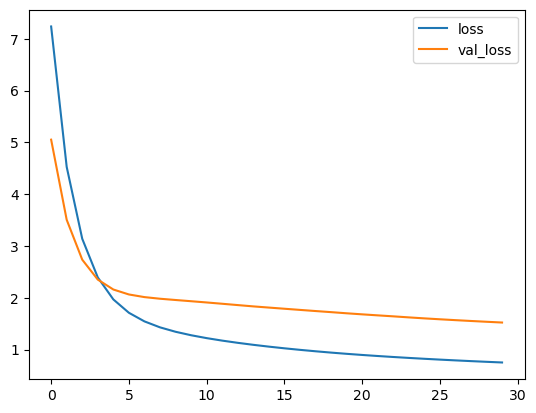

In [353]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [354]:
mse_test = model.evaluate(X_test,y_test)
mse_test

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.8671


0.7760865092277527

In [355]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [356]:
print(y_nueva)
print(y_test[:3])

[[2.15232  ]
 [3.1074145]
 [1.6908932]]
[2 4 2]
